# Linear Soft Margin SVM
SVM is a classification algorithm that aims at finding the decision surface which maximizes the margin between itself and the class samples. <br>
In the context of SVM, we define *margin* as the distance between the hyperplane and the sample which is the closest to it. <br>
The linear function, wrt $\mathbf{x}$:
$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$
represents the equation of the hyperplane, if put equal to zero:
$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = 0
$$
Recalling that the perpendicular distance of a point $\mathbf{x}$ from an hyperplane $y(\mathbf{x}) = 0$ is $\mid y(\mathbf{x}) \mid / \|\mathbf{w}\|$, we can write:
$$
d(\mathbf{x}_i) = \frac{\mid \mathbf{w}^T \mathbf{x}_i + b \mid}{\|\mathbf{w}\|}
$$
where $\mathbf{w}$ si always the weights vector, orthogonal to the hyperplane. <br>
We can introduce the same substitution for the classes we used when computing the average Loss Function for L.R.:
$$
z_i = 2c_i - 1 \implies
\begin{cases}
    z_i = 2* 0 - 1 = -1 & \text{if } c_i = 0 \\
    z_i = 2 * 1 - 1 = 1  & \text{if } c_i = 1
\end{cases}
$$
Since at the numerator we have the absolute value, the the distance doesn't change if we write:
$$
d(\mathbf{x}_i) = \frac{\mid z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \mid}{\|\mathbf{w}\|}
$$
If we just want to consider solutions which **correctly classify all samples**, we can thus maximize, wrt the model parameters $(\mathbf{w}, b)$, the objective function:
$$
\operatorname*{argmax}_{\mathbf{w}, b} \left\{ \operatorname*{min}_{i} \left\{\frac{\mid z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \mid}{\|\mathbf{w}\|} \right\} \right\} \\[1em]
\text{subject to: } z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) > 0
$$
So, in other words, we want to find the hyperplane, described by $(\mathbf{w}, b)$, which has the maximum distance to its closest point, so the largest minimum distance from the samples. The contraint ensures we just select hyperplanes which make just correct clasifications. <br>
We can write this in a more compact form, and meanwhile also drop the contraint and the absolute value at the denominator, observing that all solutions which correctly classify all samples meet the contraint for each sample $\mathbf{x}_i$ and so for them we will always have $\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} > 0$, so:
$$
\operatorname*{argmax}_{\mathbf{w}, b} \left\{ \frac{1}{\|\mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} \right\}
$$
Now, we can exploit the property of this objective function being **invariant to rescaling**, i.e. given the rescaling factor $\phi > 0$ we know that both functions:
$$
\frac{1}{\|\mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} \\[1em]
\frac{1}{\|\phi \mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \phi \mathbf{w}^T \mathbf{x}_i + \phi b \right) \right\} \\[1em]
$$
will lead to both optimal solutions $(\mathbf{w}^*, b^*)$ or $(\phi \mathbf{w}^*, \phi b^*)$. In other words, the collection of parameters $(\phi \mathbf{w}^*, \phi b^*)\mid_{\phi > 0}$ forms an **equivalence class** of equivalent solutions. <br>
Because of the fact that we can choose any solution among them, to simplify the objective function we choose the one corresponding to $\phi = 1$, so for which we have:
$$
\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} = 1
$$
The objective function thus becomes just:
$$
\frac{1}{\|\mathbf{w}\|} \\[1em]
\text{subject to: }
\begin{cases}
\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} = 1 \\
z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i
\end{cases}
$$
Then, in order to link the SVM objective to the L.R. one, we can make some constant transformations. Then we can also drop the first contraint observing that, since we're **minimizing** the objective function (because we now put $\mathbf{w}$ at the numerator thanks to these transformations), optimal solutions will have just points such that $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1$, so we can write the **Primal Formulation of the Hard-Margin SVM Problem**:
$$
\operatorname*{argmin}_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \\[1em]
\text{subject to: } z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i
$$
It's called **Hard Margin** since all of this is based on the assumption that the optimal solution always correctly classify all points (and this is expressed in the contraint). <br>

Then, the steps to recover the **Soft Margin** version of the primal formulation of the problem are pretty quick.<br>
If classes are **not linearly separable**, we won't be abe to find a solution which satisfies the primal contraint $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i$. We can make a trade off and accept to have some samples which sit **inside the margin region** (for them we would have $ 0 \leq z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \lt 1$) or, if we want, are even **missclassified** (i.e, they end up on the opposite side of the decision boundary after the margin, for them we would have $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \lt 0$) and try to achieve the largest margin between all the correcty classified samples. In  practice, we introduce the so called **slack variables** $\xi_i$ in the primal constraint:
$$
z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 - \xi_i \\
\xi_i \geq 0
$$
Keep in mind that $\xi_i \geq 0$ is an additional primal contraint related to the Soft Margin formulation of the problem. So:
- correctly classified points not inside the margin will have $\xi_i = 0$
- correctly classified points which sit inside the margin will have $0 \lt \xi_i \lt 1$
- missclassified points will have $\xi_i \geq 1$

The functional:
$$
\Phi(\xi) = \sum_{i = 1}^{n} (\xi_i)^{\sigma}
$$
- for small values of $\sigma$ is approximately equal to the number of points violating the hard margin contraint
- for $\sigma = 1$ represents **an upper bound** on the number of samples violating the hard margin contraint

Since using small values of $\sigma$ makes the problem not convex anymore, we set $\sigma = 1$ and can finally write the **Primal Formulation of the Soft-Margin SVM Problem**:
$$
\operatorname*{min}_{\mathbf{w}, b, \mathbf{\xi}} \left\{ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i = 1}^{n} \xi_i\right\} \\[1em]
\text{subject to: }
\begin{cases}
z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \geq 1 - \xi_i \space \forall i \\
\xi_i \geq 0 \space \forall i
\end{cases}
$$
where $C$ is the hyperparameter which regulates the trade off:
- for small values of $C$ we concentrate more on achieving the largest margin and less on minimizing samples violations, so the model will generalize better on unseen data, but te error rate on the training set will increase
- for high values of $C$ we prefer first to minimize samples vuilations (because the second term in now stronger), and just after we concentrate on achieving a large margin for non violating points. In this case the model will achieve much better performances on the training set but won't be able to generalize as much.

We can even turn this problem into an **unconstrained** one by remembering that:
- correctly classified samples which are not inside the margin region have:
    $$
    \begin{cases}
        \xi_i = 0 \\
        z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \geq 1
    \end{cases}
    $$
- all the other samples are violating the hard margin primal constraint so they have:
    $$
    \begin{cases}
        \xi_i \gt 0 \\
        z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) = 1 - \xi_i
    \end{cases}
    $$

So $\xi_i$ can either assume value $0$ (first case) or $1 - z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right)$ (second case). <br>
We can directly insert these two cases into the objective and get rid of the primal contraints:
$$
\operatorname*{min}_{\mathbf{w}, b, \mathbf{\xi}} \left\{ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i = 1}^{n} \operatorname*{max} \left[ 0, 1 - z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \right]\right\}
$$
where $f(z_i s_i) = \operatorname*{max} \left[ 0, 1 - z_i s_i \right]$ is called **Hinge Loss**. <br> <br>

**Unfortunately, the unconstrained formulation of the primal objective function is non-differentiable. While the L-BFGS method may still be able to find the minimizer of the objective, we have no guarantee that the algorithm will stop close to the optimal value of $(\mathbf{w}, b)$.**

So, we can introduce (and later use) the **Lagrangian formulation** of this problem, incorporating the two primal contraints directly in the objective function, using the two Lagrangian multipliers $\alpha_i \geq 0$, $\mu_i \geq 0$:
$$
L(\mathbf{w}, b, \xi, \alpha, \mu) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i [z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^{n} \mu_i \xi_i
$$
The optimal solution has to satisfy the **KKT conditions**:
1) **Stationary Conditions**: <br>
    These conditions are obtained by taking the partial derivatives of the Lagrangian L with
    respect to each of the primal variables and setting them to zero:
    $$
    \nabla_{\mathbf{w}} L(\mathbf{w}, b, \xi, \alpha, \mu) = \mathbf{w} - \sum_{i=1}^{n} \alpha_i z_i \mathbf{x}_i = 0
    $$

    $$
    \frac{\partial L(\mathbf{w}, b, \xi, \alpha, \mu)}{\partial b} = - \sum_{i=1}^{n} \alpha_i z_i = 0
    $$

    $$
    \frac{\partial L(\mathbf{w}, b, \xi, \alpha, \mu)}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \forall i
    $$

2) **Primal Feasibility Conditions**: <br>
    These are the original inequality constraints of the SVM primal problem. The Lagrangian
    was constructed to incorporate these:
    $$
    z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i \geq 0 \quad \forall i
    $$

    $$
    \xi_i \geq 0 \quad \forall i
    $$

3) **Dual Feasibility Conditions**: <br>
    The Lagrange multipliers associated with inequality constraints must be non-negative:
    $$\alpha_i \ge 0 \quad \forall i$$
    $$\mu_i \ge 0 \quad \forall i$$

4) **Complementary Slackness Conditions**: <br>
    For each inequality constraint, the product of the Lagrange multiplier and the constraint
    itself must be zero at the optimal solution:
    $$
    \alpha_i [z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] = 0 \quad \forall i
    $$

    $$
    \mu_i \xi_i = 0 \quad \forall i
    $$

We can rewrite the objective in a simpler way using the precious results we obtain from the **Stationary Conditions**:
$$
\mathbf{w} = \sum_{i=1}^{n} \alpha_i z_i \mathbf{x}_i
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

$$
\alpha_i = C - \mu_i
$$
Also, combining the conditions: $\alpha_i = C - \mu_i$,  $\alpha_i \geq 0$,  $\mu_i \geq 0$ lets us find the so called **box contraints**:
$$
0 \leq \alpha_i \leq C
$$
Keeping in mind we must satisfy the box contraints, we can replace $\mathbf{w}$, $\alpha_i$ and $\xi_i$ inside the Lagrangian primal objective function to obtain
the **Dual Soft Margin SVM Problem**:
$$
\max_{\alpha} L_D(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j z_i z_j \mathbf{x}_i^T \mathbf{x}_j
$$

$$
\text{subject to:}
$$

$$
0 \leq \alpha_i \leq C, \quad \forall i
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

The SVM dual optimization problem can be expressed in **matrix form** as maximizing the objective function $J^D(\alpha)$:

$$
J^D(\mathbf{\alpha}) = -\frac{1}{2}\mathbf{\alpha}^T \mathbf{H} \mathbf{\alpha} + \mathbf{\alpha}^T \mathbf{1}
$$

$$
\text{subject to:}
$$

$$
0 \le \alpha_i \le C, \quad \forall i
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

where:
* $\mathbf{1}$ is an n-dimensional vector of ones.
* $\mathbf{H}$ is an $n \times n$ matrix whose elements are given by $H_{ij} = z_i z_j \mathbf{x}_i^T \mathbf{x}_j$. This matrix is also known as the Gram matrix of the kernel function (in this case, a linear kernel).

The SVM dual solution, denoted as $\alpha^*$, is the value of $\alpha$ that maximizes $J^D(\alpha)$. The optimal weight vector $\mathbf{w}^*$ of the primal problem is then related to the optimal $\alpha^*$ by:

$$
\mathbf{w}^* = \sum_{i=1}^{n} \alpha_i^* z_i \mathbf{x}_i
$$








Now, the problem is that the L-BFGS algorithm is able to handle box constraints, however it cannot incorporate $\sum_{i=1}^{n} \alpha_i z_i = 0$. <br>
The constraint derives from the presence of the **bias** term in the SVM primal formulation. <br>
We therefore slightly modify the SVM problem as to make the constraint disappear. This way we will be able to use **L-BFGS-B** (the B stands for box-constraints) to **solve the dual problem**. <br>
We reformulate the primal problem as the minimization of
$$
\hat{J}(\hat{\mathbf{w}}) = \frac{1}{2} \|\hat{\mathbf{w}}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - z_i (\hat{\mathbf{w}}^T \hat{\mathbf{x}}_i))
$$
where
$$
\hat{\mathbf{x}}_i = \begin{bmatrix} \mathbf{x}_i \\ 1 \end{bmatrix}, \quad \hat{\mathbf{w}} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix}
$$
We can observe that $\hat{\mathbf{w}}^T \hat{\mathbf{x}}_i = \mathbf{w}^T \mathbf{x} + b$, i.e. the scoring rules have the same expression as the original formulation. However, in contrast with the original SVM problem, we are also regularizing the value of the bias term, since we regularize the norm of $\hat{\mathbf{w}}$:
$$
\|\hat{\mathbf{w}}\|^2 = \|\mathbf{w}\|^2 + b^2
$$
Regularization of the bias can, in general, lead to sub-optimal decisions in terms of separating margin. We can mitigate this effect by using a mapping
$$
\hat{\mathbf{x}}_i = \begin{bmatrix} \mathbf{x}_i \\ K \end{bmatrix}
$$
As K becomes larger, the effects of regularizing b become weaker. However, as K becomes larger, the dual problem also becomes harder to solve (i.e. the algorithm may require many additional iterations).

The dual objective of the modified primal SVM becomes the maximization of
$$
\hat{\mathcal{J}}^D(\alpha) = -\frac{1}{2} \alpha^T \hat{\mathbf{H}} \alpha + \alpha^T \mathbf{1}
$$
$$\text{subject to }$$
$$0 \le \alpha_i \le C \quad \forall i \in \{1...n\}$$

i.e., the same formulation as before but without the equality constraint and with matrix $\hat{\mathbf{H}}$ computed from the extended features $\hat{\mathbf{x}}_i$ rather than from the original features $\mathbf{x}_i$:
$$
\hat{\mathbf{H}}_{i,j} = z_i z_j \hat{\mathbf{x}}_i^T \hat{\mathbf{x}}_j
$$


In [7]:
from load_split import load_iris_binary, split_db_2to1
import matplotlib.pyplot as plt

from SVM.SVM_linear import fit_SVM_Linear_SoftMargin
from SVM.SVM_nonlinear import get_rbf_kernel_function, fit_SVM_Kernel_SoftMargin, get_poly_kernel_function

In [8]:
D,L = load_iris_binary()
print(f'D.shape: {D.shape}')
print(f'L.shape: {L.shape}')

#tran validation split
(DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L)

print(f'DTR.shape: {DTR.shape}')
print(f'LTR.shape: {LTR.shape}')
print(f'DVAL.shape: {DVAL.shape}')
print(f'LVAL.shape: {LVAL.shape}')

D.shape: (4, 100)
L.shape: (100,)
DTR.shape: (4, 66)
LTR.shape: (66,)
DVAL.shape: (4, 34)
LVAL.shape: (34,)


In [9]:
a = [1] * 2
a

[1, 1]

We can even test if our computations are correct, by computing the **duality gap** between the primal and the dual, remembering that $\hat{\mathcal{J}}^D(\mathbf{\hat{\alpha}}) \leq \hat{\mathcal{J}}(\mathbf{\hat{w}})$. At the optimal solution we must have:
$$
\hat{\mathcal{J}}^D(\mathbf{\hat{\alpha}}^*) = \hat{\mathcal{J}}(\mathbf{\hat{w}}^*)
$$
Remember that the primal objective is:
$$
\hat{J}(\mathbf{\hat{w}}^*) = \frac{1}{2} ||\mathbf{\hat{w}}^*||^2 + C \sum_{i=1}^{n} \max(0, 1 - z_i(\mathbf{\hat{w}}^{*T} \mathbf{\hat{x}}_i))
$$


Then we have to compute the score:
$$
s(\mathbf{x}_t) = \mathbf{w}^*{^T} \mathbf{x}_t + b^*
$$

At the end we can test the performances of our model with different values for the hyperparameters $K$, $C$ (we would normally find the best parameters using cross validation, in this case with a grid search since they are independent):


Dual objective function called 130 times, number of iterations: 94
SVM_Linear_SoftMargin, hyperparams C = 0.1, K = 1.0, Primal(bestW_hat) = 3.7749740441903645, Dual(bestAlpha_hat) = 3.7749738248233986, computed duality gap: 2.1936696592561589e-07
Tested SVM_Linear_SoftMargin with C = 0.1, K = 1.0, minDCF = 0.05555555555555555, DCF = 0.0625, errorRate = 0.029411764705882353

Dual objective function called 203 times, number of iterations: 157
SVM_Linear_SoftMargin, hyperparams C = 1.0, K = 1.0, Primal(bestW_hat) = 15.779941859294638, Dual(bestAlpha_hat) = 15.779930849504762, computed duality gap: 1.100978987622625e-05
Tested SVM_Linear_SoftMargin with C = 1.0, K = 1.0, minDCF = 0.05555555555555555, DCF = 0.11805555555555555, errorRate = 0.058823529411764705

Dual objective function called 280 times, number of iterations: 197
SVM_Linear_SoftMargin, hyperparams C = 10.0, K = 1.0, Primal(bestW_hat) = 78.96892834899333, Dual(bestAlpha_hat) = 78.96892834899731, computed duality gap: -3.97903

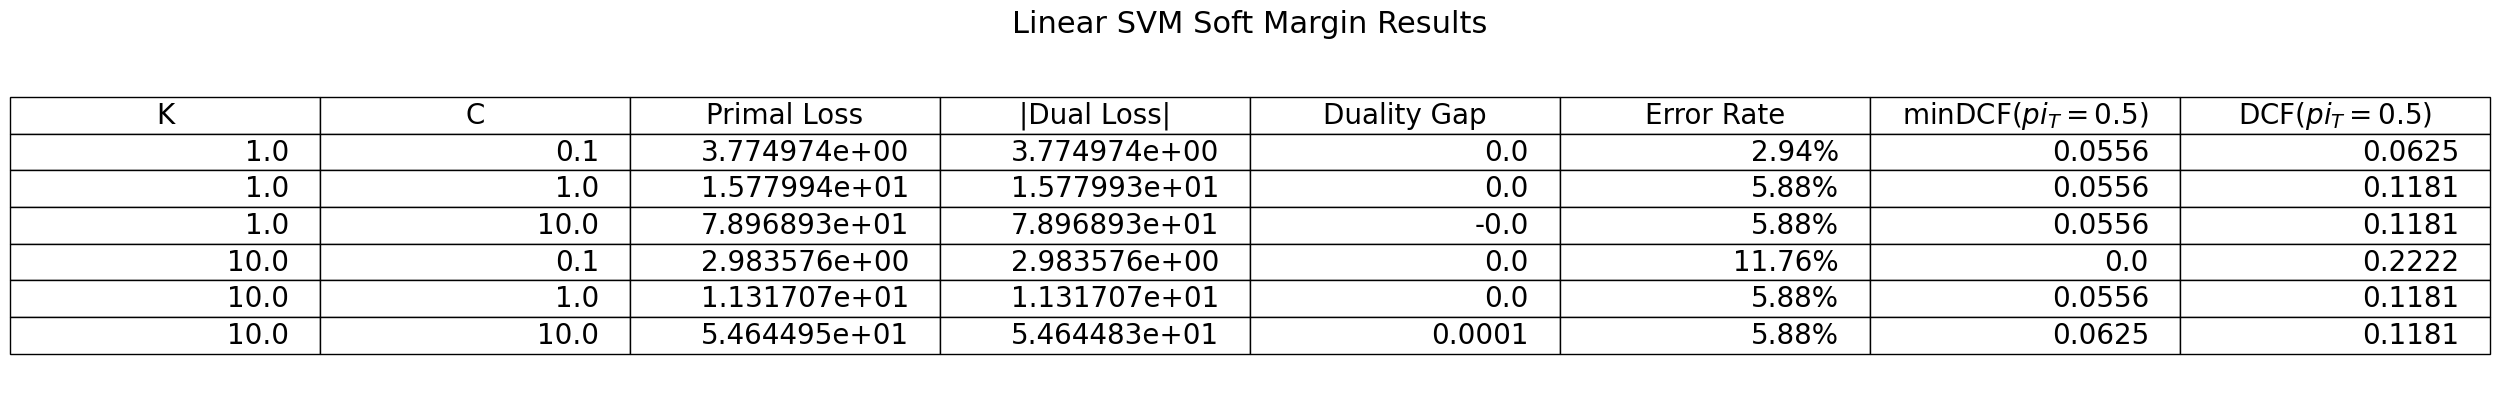

In [10]:
K_values = [1.0, 10.0]
C_values = [0.1, 1.0, 10.0]
appPriorTrue = 0.5
K_table = []
C_table = []
bestW_table = []
bestB_table = []
minDCF_table = []
DCFs_table = []
errorRate_table = []
primal_loss_table = []
dual_loss_table = []
dualitygap_table = []

for K_test in K_values:
    for C_test in C_values:
        bestW, bestB, minDCF, DCF, errorRate, primal, dual, dualitygap = fit_SVM_Linear_SoftMargin(DTR, LTR, DVAL, LVAL, C_test, K_test, appPriorTrue)
        print(f"Tested SVM_Linear_SoftMargin with C = {C_test}, K = {K_test}, minDCF = {minDCF}, DCF = {DCF}, errorRate = {errorRate}")
        K_table.append(K_test)
        C_table.append(C_test)
        bestW_table.append(bestW)
        bestB_table.append(bestB)
        minDCF_table.append(minDCF)
        DCFs_table.append(DCF)
        errorRate_table.append(errorRate)
        primal_loss_table.append(primal)
        dual_loss_table.append(dual)
        dualitygap_table.append(dualitygap)


#plot the results
#create table
table_data = []
for i in range(len(K_table)):
    table_data.append([K_table[i], C_table[i], f"{primal_loss_table[i]:.6e}", f"{-dual_loss_table[i]:.6e}", round(dualitygap_table[i], 4), f"{errorRate_table[i] * 100:.2f}%", round(minDCF_table[i], 4), round(DCFs_table[i], 4)])

fix, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=['K', 'C', 'Primal Loss', '|Dual Loss|', 'Duality Gap', 'Error Rate', 'minDCF($pi_T = 0.5$)', 'DCF($pi_T = 0.5$)'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(5, 2.2)
plt.title('Linear SVM Soft Margin Results', fontsize = 22)
plt.show()



# Kernel (non linear) Soft Margin SVM
An important thing to note is that in the Dual problem, both the objective and the score depend on the samples just by means of **pairwise dot products**:
$$
L_D(\mathbf{\alpha}^*) = \sum_{i=1}^{n} \mathbf{\alpha}_i^* - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \mathbf{\alpha}_i^* \mathbf{\alpha}_j^* z_i z_j \mathbf{x}_i^T \mathbf{x}_j = \sum_{i=1}^{n} \mathbf{\alpha}_i^* - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \mathbf{\alpha}_i^* \mathbf{\alpha}_j^* z_i z_j <\mathbf{x}_i, \mathbf{x}_j>
$$

$$
\text{subject to:}
$$

$$
0 \leq \mathbf{\alpha}_i^* \leq C, \quad \forall i

\quad \quad \sum_{i=1}^{n} \mathbf{\alpha}_i^* z_i = 0 \\[3em]


s(\mathbf{x}_t) = \mathbf{w}^*{^T} \mathbf{x}_t + b^* \xrightarrow[\text{I KKT}]{} \left(\sum_{i=1}^{n} \mathbf{\alpha_i}^* z_i \mathbf{x}_i \right)^T \mathbf{x}_t + b^* = \\[0.75em]
= \sum_{i=1}^{n} \mathbf{\alpha_i}^* z_i \mathbf{x}_i^T \mathbf{x}_t + b^* = \sum_{i=1}^{n} \mathbf{\alpha_i}^* z_i <\mathbf{x}_i, \mathbf{x}_t> + b^*
$$

So, if in L.R. to achieve non-linear classification we have to explictly expand the features space through transforations, with SVM we can optimize this whole process and make it way more efficient by just **computing these dot products between the expanded features, not explicictly expanding the feature space**. It’s sufficient
that we are able to compute the scalar product between the expanded features:
$$
k(x_1, x_2) = \space <\Phi(x_1), \Phi(x_2)> \space = \Phi(x_1)^T \Phi(x_2)
$$
where function $k(x_1, x_2)$ is called **kernel function**. This whole process is called **kernel trick**: computig and achieving non-linear separation surfaces using kernel functions, without having to directly expand the features space and do all the mapping. <br>
In practice, we can partially reuse the previous code, making some adjustments:
- when computing the dual objective function (in `SVM_dualObj(alpha)`), we now compute the elements of matrix $\mathbf{H}$ using the kernel function, as:
    $$
    \mathbf{H}_{i, j} = z_i z_j k(\mathbf{x}_i, \mathbf{x}_j)
    $$
- In contrast with linear SVM, we are not able to compute the primal solution and its cost directly. However, we can exploit the primal-dual solution relationship to express the primal objective in terms of dual variable $\mathbf{\alpha}$, in the function `SVM_primalObj(W_hat)` which now becomes: `SVM_primalObj(alpha)`:
    $$
    \hat{J}(\hat{w}) = \frac{1}{2} ||\hat{w}||^2 + C \sum_{i=1}^{n} \max(0, 1 - z_i(\hat{w}^T \hat{x}_i))
    $$

    $$
    = \frac{1}{2} \alpha^T H \alpha^T + C \sum_{i=1}^{n} \max(0, 1 - H_{i,*} \alpha)
    $$

    where $H_{i,*}$ is the $i$-th row of $H$. Note that the terms $H_{i,*} \alpha$ correspond to the components of the vector $H \alpha$, and can thus be computed from the latter.
- **In this case we don't expand $\text{DTR}$ to $\text{DTR}_{\text{hat}}$, so we work with the original features**. However, to solve the bias problem we had also before and **add  a (regularized) bias** we have to sum the term $\xi = K^2$ to the computed kernel function:
$$
\hat{k}(\mathbf{x}_1, \mathbf{x}_2) = k(\mathbf{x}_1, \mathbf{x}_2) + \xi
$$

- At the end, having regularized the bias, the score is computed as:
    $$
    s(\mathbf{x_t}) = \sum_{i=1}^{n} \alpha_i^* z_i \hat{k}(\mathbf{x_i}, \mathbf{x_t})
    $$
- We try both **polynomial** and **RBF** (*Radial Basis Function*) **kernels**:
    * Polynomial kernel of degree $d$: $k(\boldsymbol{x_1}, \boldsymbol{x_2}) = (\boldsymbol{x_1}^T \boldsymbol{x_2} + c)^d$
    * Radial Basis Function kernel: $k(\boldsymbol{x_1}, \boldsymbol{x_2}) = e^{-\gamma ||\boldsymbol{x_1} - \boldsymbol{x_2}||^2}$



Dual objective function called 388 times, number of iterations: 284
SVM_Linear_SoftMargin, hyperparams C = 1.0, K = 0.0, Primal(bestAlpha_hat) = 6.6636826689475095, Dual(bestAlpha_hat) = 6.663627830941068, computed duality gap: 5.4838006441571e-05
Tested SVM_Kernel_SoftMargin with K = 0.0, kernel_function_index = 0, minDCF = 0.0625, DCF = 0.1736111111111111, errorRate = 0.08823529411764706

Dual objective function called 355 times, number of iterations: 264
SVM_Linear_SoftMargin, hyperparams C = 1.0, K = 1.0, Primal(bestAlpha_hat) = 6.296912422956959, Dual(bestAlpha_hat) = 6.296912183695452, computed duality gap: 2.3926150749531416e-07
Tested SVM_Kernel_SoftMargin with K = 1.0, kernel_function_index = 0, minDCF = 0.0625, DCF = 0.1736111111111111, errorRate = 0.08823529411764706

Dual objective function called 527 times, number of iterations: 387
SVM_Linear_SoftMargin, hyperparams C = 1.0, K = 0.0, Primal(bestAlpha_hat) = 3.5929190730395395, Dual(bestAlpha_hat) = 3.592918442262477, com

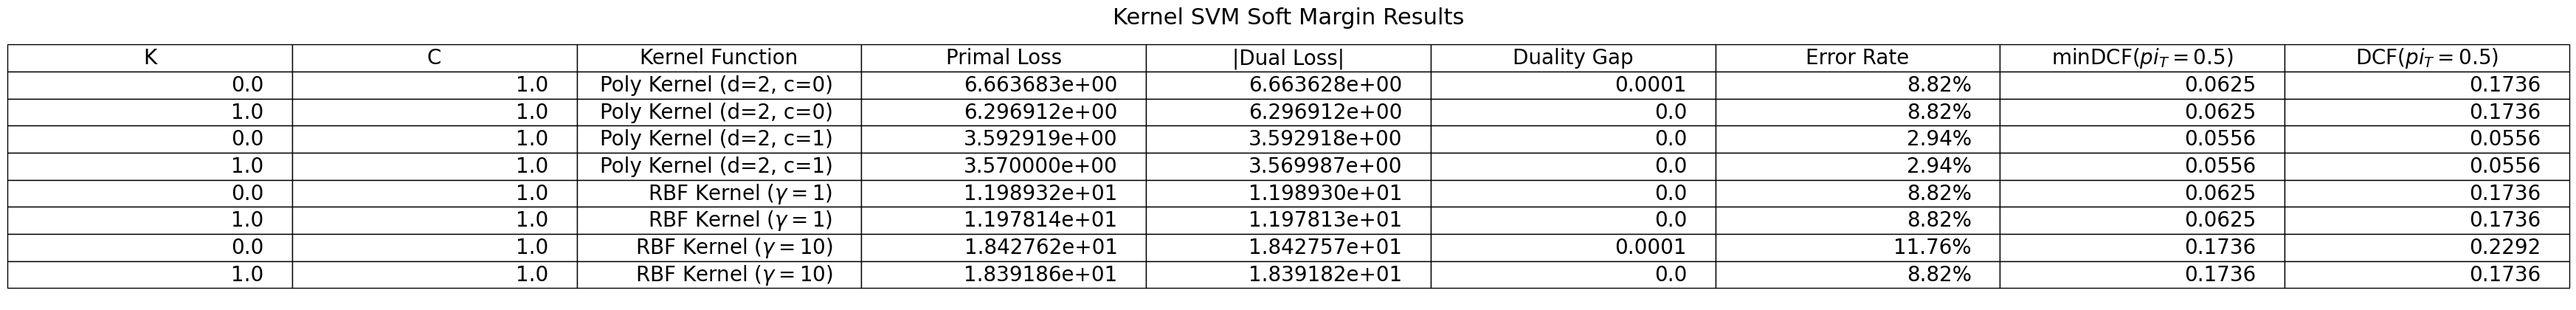

In [11]:
appPriorTrue = 0.5
C_table = []
K_table = []
bestAlpha_table = []
primal_loss_table = []
dual_loss_table = []
dualitygap_table = []
errorRate_table = []
minDCF_table = []
DCF_table = []
kernel_function_table = []
kernels = [get_poly_kernel_function(2.0, 0.0), get_poly_kernel_function(2.0, 1.0), get_rbf_kernel_function(1.0), get_rbf_kernel_function(10.0)]
for k in range(len(kernels)):
    for K_test in [0.0, 1.0]:
        bestAlpha_hat, minDCF, DCF, errorRate, primal_loss, dual_loss, dualitygap = fit_SVM_Kernel_SoftMargin(DTR, LTR, DVAL, LVAL, 1.0, kernels[k], K_test, appPriorTrue)
        print(f"Tested SVM_Kernel_SoftMargin with K = {K_test}, kernel_function_index = {k}, minDCF = {minDCF}, DCF = {DCF}, errorRate = {errorRate}")
        K_table.append(K_test)
        C_table.append(1.0)
        bestAlpha_table.append(bestAlpha_hat)
        primal_loss_table.append(primal_loss)
        dual_loss_table.append(dual_loss)
        dualitygap_table.append(dualitygap)
        errorRate_table.append(errorRate)
        minDCF_table.append(minDCF)
        DCF_table.append(DCF)
        if k == 0:
            kernel_function_table.append('Poly Kernel (d=2, c=0)')
        elif k == 1:
            kernel_function_table.append('Poly Kernel (d=2, c=1)')
        elif k == 2:
            kernel_function_table.append(r'RBF Kernel ($\gamma=1$)')
        elif k == 3:
            kernel_function_table.append(r'RBF Kernel ($\gamma=10$)')



#plot the results
#create table
table_data = []
for i in range(len(K_table)):
    table_data.append([K_table[i], C_table[i], kernel_function_table[i], f"{primal_loss_table[i]:.6e}", f"{-dual_loss_table[i]:.6e}", round(dualitygap_table[i], 4), f"{errorRate_table[i] * 100:.2f}%", round(minDCF_table[i], 4), round(DCF_table[i], 4)])

fix, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=['K', 'C', 'Kernel Function', 'Primal Loss', '|Dual Loss|', 'Duality Gap', 'Error Rate', 'minDCF($pi_T = 0.5$)', 'DCF($pi_T = 0.5$)'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(7, 2.2)
plt.title('Kernel SVM Soft Margin Results', fontsize = 22)
plt.show()


